In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

In [106]:
df= pd.read_csv("/Admission_Predict.csv")

In [107]:
df.drop('Serial No.', axis='columns', inplace=True)

In [108]:
def describe(df):                       
                                        
  columns=df.columns.to_list()           
  ncol=df.describe().columns.to_list()
  ccol=[]
  for i in columns:
    if(ncol.count(i)==0):
      ccol.append(i)
    else:
      continue
  print('Name of all columns in the dataframe:')
  print(columns)
  print('')
  print('Number of columns in the dataframe:')
  print(len(columns))
  print('')
  print('Name of all numerical columns in the dataframe:')
  print(ncol)
  print('')
  print('Number of numerical columns in the dataframe:')
  print(len(ncol))
  print('')
  print('Name of all categorical columns in the dataframe:')
  print(ccol)
  print('')
  print('Number of categorical columns in the dataframe:')
  print(len(ccol))
  print('')
  print('------------------------------------------------------------------------------------------------')
  print('')
  print('Number of Null Values in Each Column:')
  print('')
  print(df.isnull().sum())
  print('')
  print('')
  print('Number of Unique Values in Each Column:')
  print('')
  print(df.nunique())
  print('')
  print('')
  print('Basic Statistics and Measures for Numerical Columns:')
  print('')
  print(df.describe().T)
  print('')
  print('')
  print('Other Relevant Metadata Regarding the Dataframe:')
  print('')
  print(df.info())
  print('')
  print('')


In [109]:
import warnings
warnings.filterwarnings("ignore")
# We are creating 3 categories for better vizualisation
# Split was chosen after Personal research and is subject to change 

df['Admit Possibility']=0
for i in range(0,len(df)):
  if(df['Chance of Admit '][i]>0.80):
    df['Admit Possibility'][i]='High'
  elif(df['Chance of Admit '][i]<0.60):
    df['Admit Possibility'][i]='Low'
  else:
    df['Admit Possibility'][i]='Fair'


In [110]:
describe(df)

Name of all columns in the dataframe:
['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'Admit Possibility']

Number of columns in the dataframe:
9

Name of all numerical columns in the dataframe:
['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Number of numerical columns in the dataframe:
8

Name of all categorical columns in the dataframe:
['Admit Possibility']

Number of categorical columns in the dataframe:
1

------------------------------------------------------------------------------------------------

Number of Null Values in Each Column:

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
Admit Possibility    0
dtype: int64


Number of Unique Values in Each Column:

GRE Score             49
TOEFL Score           29
University Rating  

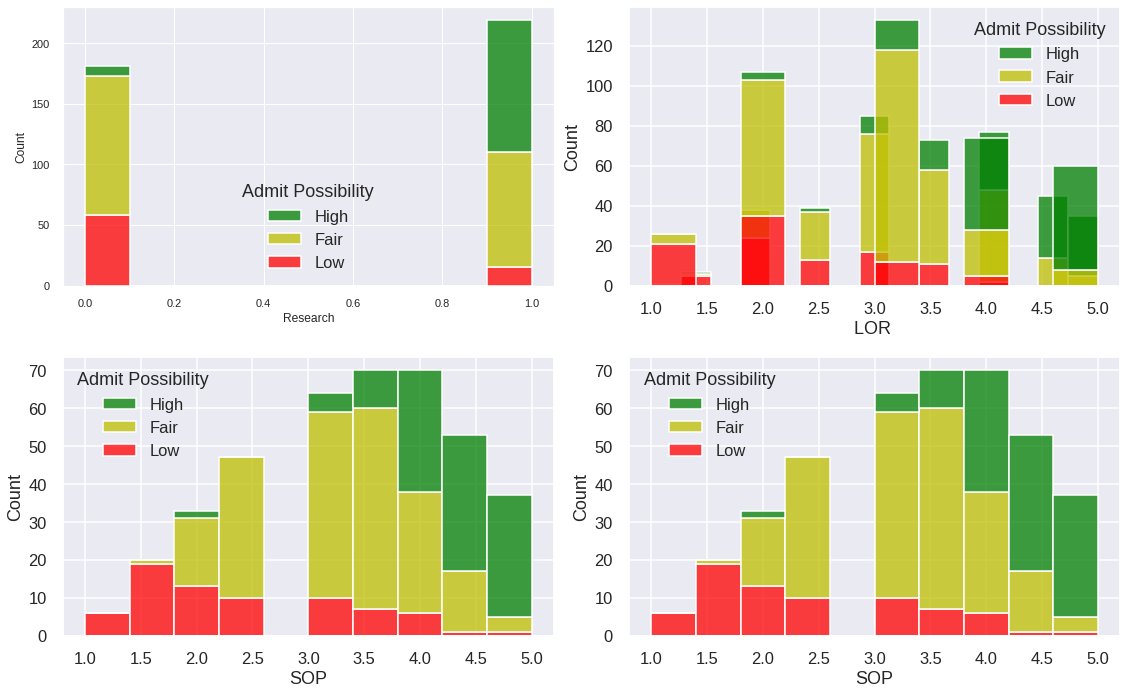

In [111]:
fig = plt.figure(figsize=(16,10))
oe=['g','y','r']
plt.subplot(2,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Research", hue="Admit Possibility",multiple="stack",palette=oe)

plt.subplot(2,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="LOR ", hue="Admit Possibility",multiple="stack",palette=oe)

plt.subplot(2,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="SOP", hue="Admit Possibility",multiple="stack",palette=oe)

plt.subplot(2,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="SOP", hue="Admit Possibility",multiple="stack",palette=oe)

plt.subplot(2,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="University Rating", hue="Admit Possibility",multiple="stack",palette=oe)

<Figure size 576x396 with 0 Axes>

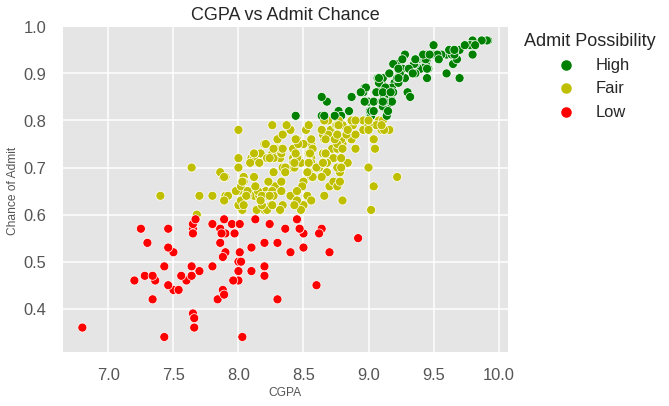

In [112]:
oe=['g','y','r']
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('talk')
plt.title('CGPA vs Admit Chance')
sns.scatterplot( x="CGPA",y='Chance of Admit ', hue="Admit Possibility",data=df,palette=oe)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Admit Possibility')

<Figure size 576x396 with 0 Axes>

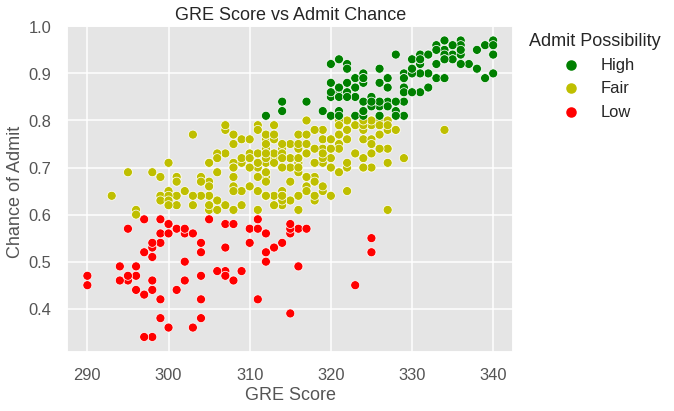

In [113]:
oe=['g','y','r']
plt.tight_layout()
fig, ax = plt.subplots(figsize=(8, 6))
style.use('ggplot')
sns.set_context('talk')
plt.title('GRE Score vs Admit Chance')
sns.scatterplot(x="GRE Score", y="Chance of Admit ", hue="Admit Possibility", data=df, palette=oe)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Admit Possibility')

<Figure size 576x396 with 0 Axes>

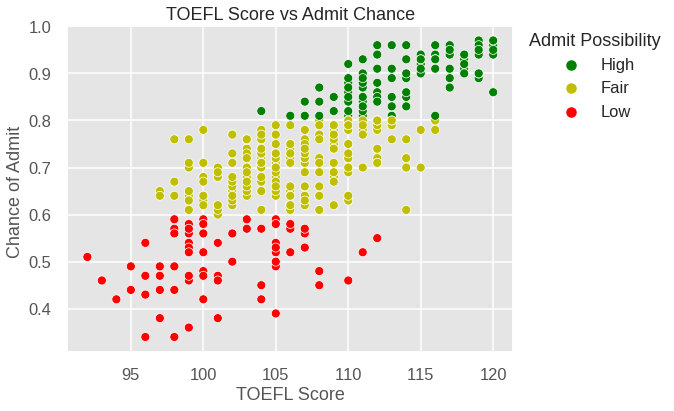

In [114]:
oe=['g','y','r']
plt.tight_layout()
fig, ax = plt.subplots(figsize=(8, 6))
style.use('ggplot')
sns.set_context('talk')
plt.title('TOEFL Score vs Admit Chance')
sns.scatterplot(x="TOEFL Score", y="Chance of Admit ", hue="Admit Possibility", data=df, palette=oe)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Admit Possibility')

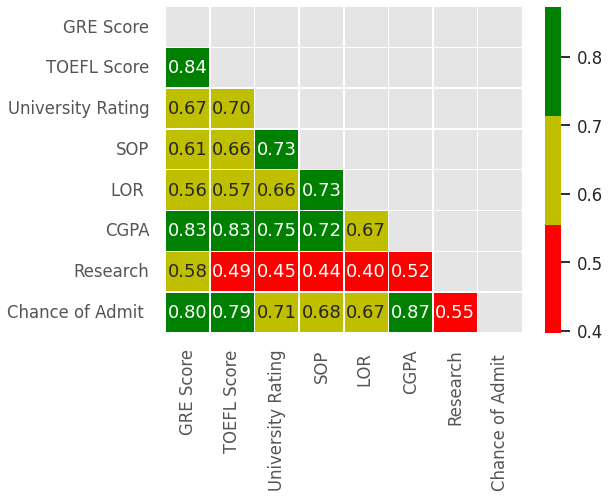

In [115]:
corr = df.corr()
oe=['r','y','g']
fig, ax = plt.subplots(figsize=(8, 6))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.set_style("white")
sns.heatmap(corr, cmap=oe, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [116]:
def outliers(df_column):
  q75, q25 = np.percentile(df_column, [75 ,25]) 
  iqr = q75 - q25
  print('q75: ',q75)
  print('q25: ',q25)
  print('Inter Quartile Range: ',round(iqr,2))
  print('Outliers lie before', q25-1.8*iqr, 'and beyond', q75+1.8*iqr) 

  # Usually 1.5 times IQR is considered, but we have used 1.8 for broader range since datapoints are very less

  print('Number of Rows with Left Extreme Outliers:', len(df[df_column <q25-1.8*iqr]))
  print('Number of Rows with Right Extreme Outliers:', len(df[df_column>q75+1.8*iqr]))
  plt.tight_layout()
  plt.style.use('seaborn')
  sns.set_context('notebook')
  sns.histplot(data=df, x=df_column, hue="Admit Possibility",multiple="stack",palette=oe)
  print('')
  

q75:  325.0
q25:  308.0
Inter Quartile Range:  17.0
Outliers lie before 277.4 and beyond 355.6
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



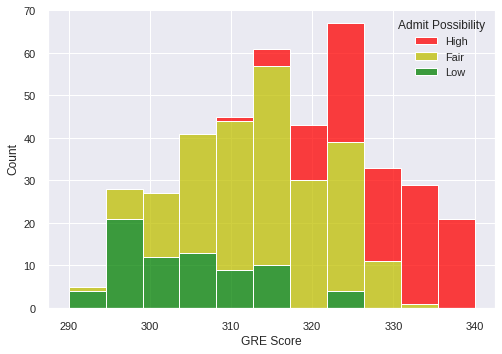

In [117]:
outliers(df['GRE Score'])

q75:  112.0
q25:  103.0
Inter Quartile Range:  9.0
Outliers lie before 86.8 and beyond 128.2
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



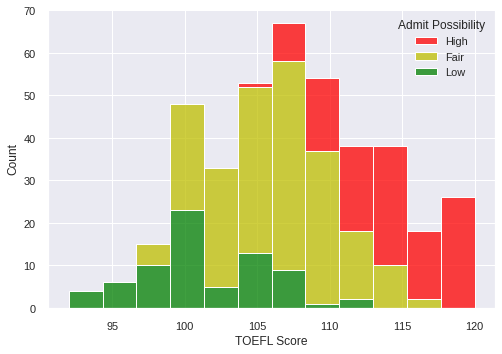

In [118]:
outliers(df['TOEFL Score'])

q75:  9.0625
q25:  8.17
Inter Quartile Range:  0.89
Outliers lie before 6.5634999999999994 and beyond 10.669
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



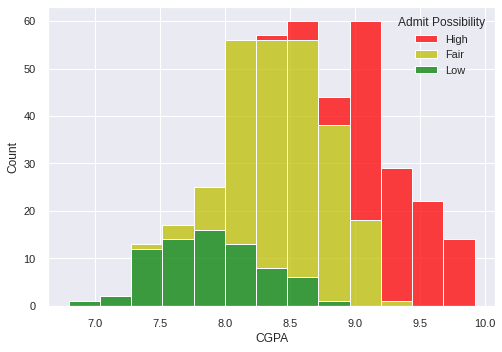

In [119]:
outliers(df['CGPA'])

q75:  4.0
q25:  3.0
Inter Quartile Range:  1.0
Outliers lie before 1.2 and beyond 5.8
Number of Rows with Left Extreme Outliers: 1
Number of Rows with Right Extreme Outliers: 0



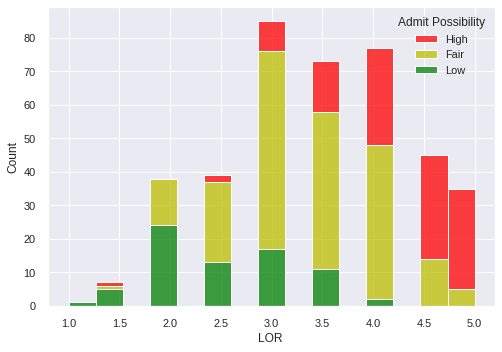

In [120]:
outliers(df['LOR '])

In [121]:
vif = df.copy()
vif.drop(columns=['Chance of Admit ','Admit Possibility','TOEFL Score'],axis=1,inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = vif.columns
vif_data["VIF"] = [variance_inflation_factor(vif.values, i)
                          for i in range(len(vif.columns))]

In [122]:
vif_data

,feature,VIF
0,GRE Score,779.947425
1,University Rating,21.743178
2,SOP,37.436799
3,LOR,38.241439
4,CGPA,977.105452
5,Research,2.854984


In [123]:
from sklearn.preprocessing import StandardScaler # Convert Columnar Data into Standard Normal Distribution
scaler=StandardScaler()
scaler.fit(vif)
scaled_data=scaler.transform(vif)
scaled_data

array([[ 1.76210664,  0.79882862,  1.09386422,  1.16732114,  1.76481828,
         0.90911166],
       [ 0.62765641,  0.79882862,  0.59665321,  1.16732114,  0.45515126,
         0.90911166],
       [-0.07046681, -0.07660001, -0.39776881,  0.05293342, -1.00563118,
         0.90911166],
       ...,
       [ 1.15124883,  0.79882862,  1.59107523,  1.16732114,  1.42900622,
         0.90911166],
       [-0.41952842, -0.07660001,  0.0994422 ,  0.61012728,  0.30403584,
        -1.09997489],
       [ 1.41304503,  0.79882862,  1.59107523,  0.61012728,  1.78160888,
         0.90911166]])

In [124]:
from sklearn.decomposition import PCA # Reduce Dimensions by Principal Component Analysis To Compensate for Variables with High VIF
pca=PCA(n_components=3)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca

array([[-3.09326531,  0.25615965, -0.46538801],
       [-1.81827699,  0.08643604,  0.533276  ],
       [ 0.36596318,  0.80786227,  0.81049486],
       ...,
       [-2.89504767, -0.06707794,  0.13306852],
       [ 0.14336199, -1.23827291, -0.11444982],
       [-2.9413952 ,  0.22794724, -0.40768904]])

LINEAR REGRESSION

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Chance of Admit '], test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(x_train, y_train)
print('Test Accuracy of Linear Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Linear Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of Linear Regression:  77.95 %

Train Accuracy of Linear Regression: 77.33 %

Mean Squared Error (MSE):  0.0755


LASSO REGRESSION

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Chance of Admit '], test_size=0.2, random_state=42)
reg=Lasso(alpha=0.005)
reg.fit(x_train, y_train)
print('Test Accuracy of Lasso Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Lasso Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of Lasso Regression:  77.56 %

Train Accuracy of Lasso Regression: 76.82 %

Mean Squared Error (MSE):  0.0761


RIDGE REGRESSION

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Chance of Admit '], test_size=0.2, random_state=42)
reg=Ridge(alpha=0.01)
reg.fit(x_train, y_train)
print('Test Accuracy of Ridge Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Ridge Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of Ridge Regression:  77.95 %

Train Accuracy of Ridge Regression: 77.33 %

Mean Squared Error (MSE):  0.0755


ELACTICNET REGRESSION

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Chance of Admit '], test_size=0.2, random_state=42)
reg=ElasticNet(alpha=0.005)
reg.fit(x_train, y_train)
print('Test Accuracy of ElacticNet Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of ElacticNet Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of ElacticNet Regression:  77.84 %

Train Accuracy of ElacticNet Regression: 77.2 %

Mean Squared Error (MSE):  0.0757


RANDOM FOREST REGRESSION

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Chance of Admit '], test_size=0.2, random_state=42)
reg = RandomForestRegressor(random_state=42)
reg.fit(x_train, y_train)
print('Test Accuracy of Random Forest Regressor Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Random Forest Regressor Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of Random Forest Regressor Regression:  73.03 %

Train Accuracy of Random Forest Regressor Regression: 95.99 %

Mean Squared Error (MSE):  0.0835


ADA BOOST REGRESSION

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Chance of Admit '], test_size=0.2, random_state=42)
import tensorflow as tf
tf.random.set_seed(0)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[]
)

history = model.fit(x_train, y_train, epochs=100)
y_pred=model.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))


Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6097
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5543
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5514
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5500
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5488
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5483
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5484
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5485
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5485
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5484
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5478
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5481
Epoch 13/100
10/10 [=================

In [131]:
from sklearn.metrics import accuracy_score
y_predict=model.predict(x_test)
y_train = (y_train>0.5)
y_test = (y_test>0.5)
from sklearn.linear_model._logistic import LogisticRegression
log = LogisticRegression(random_state=0, max_iter=1000)
log_model = lore.fit(x_train, y_train)
y_pred = log_model.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [132]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_pred)) 
print('Recall Score:', recall_score(y_test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred)) 


Accuracy Score: 0.875
Recall Score: 1.0
ROC AUC Score: 0.5
Confussion Matrix:
 [[ 0 10]
 [ 0 70]]


We have more accuracy in logistic regression.So,we use it.

In [133]:
import pickle

In [134]:

pickle.dump(scaler,open(file,'wb'))

In [135]:
filename = 'Admission.Predictor_model.pkl'
pickle.dump(log_model, open(filename, 'wb'))

In [136]:
loaded_model = pickle.load(open(filename, 'rb'))